---
### 6.3.1固定起点的最短路的 Dijkstra 算法

In [1]:
import networkx as nx
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

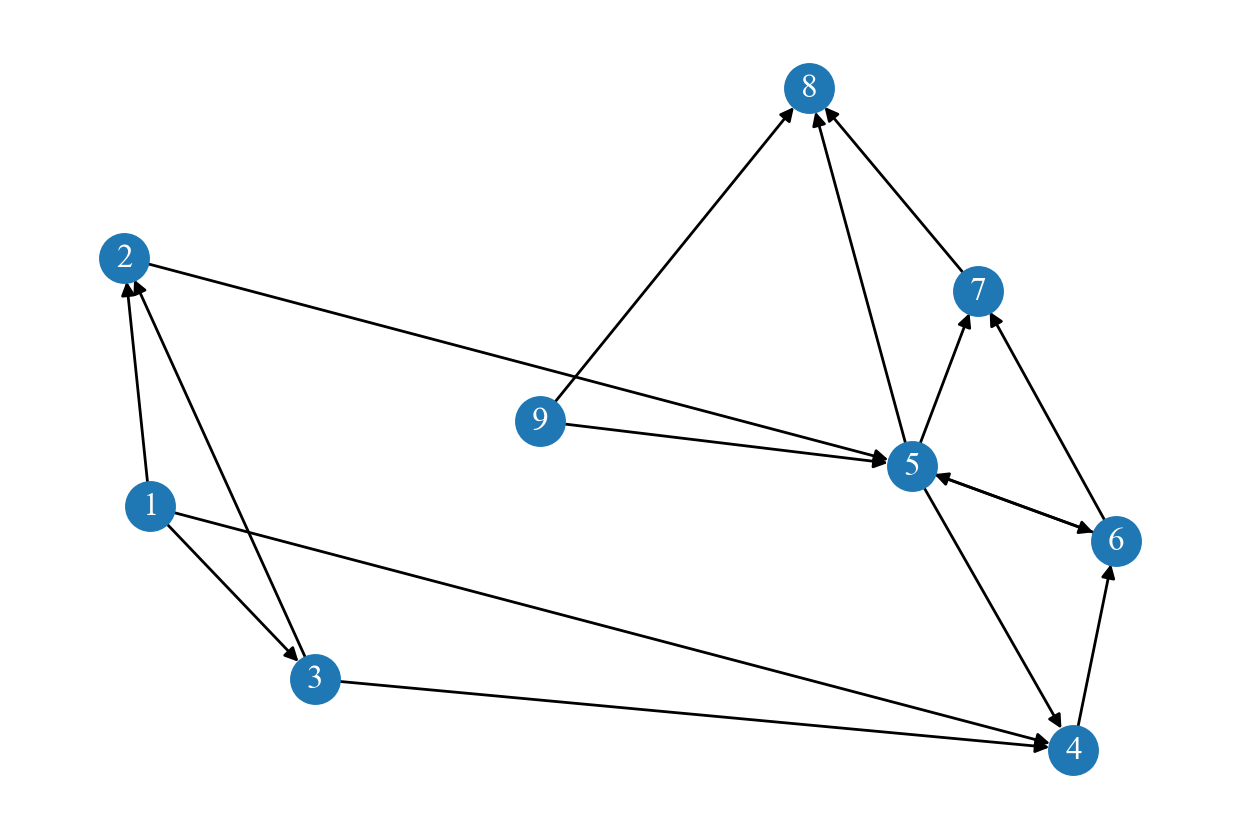

In [2]:
Adjt =[(1,2,6), (1,3,3), (1,4,1), (2,5,1), (3,2,2), (3,4,2), (4,6,10), (5,4,6),
    (5,6,4), (5,7,3), (5,8,6), (6,5,10), (6,7,2), (7,8,4), (9,5,2), (9,8,3)]
G = nx.DiGraph()
G.add_nodes_from(range(1, 10))
G.add_weighted_edges_from(Adjt)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_color='w')

#### 手写版
1. 处理邻接矩阵

In [3]:
V = np.array(G.nodes) - 1
W = nx.to_numpy_matrix(G, )
W[np.where(W == 0)] = np.inf
for i in range(len(V)):
    W[i, i] = 0
V, W

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 matrix([[ 0.,  6.,  3.,  1., inf, inf, inf, inf, inf],
         [inf,  0., inf, inf,  1., inf, inf, inf, inf],
         [inf,  2.,  0.,  2., inf, inf, inf, inf, inf],
         [inf, inf, inf,  0., inf, 10., inf, inf, inf],
         [inf, inf, inf,  6.,  0.,  4.,  3.,  6., inf],
         [inf, inf, inf, inf, 10.,  0.,  2., inf, inf],
         [inf, inf, inf, inf, inf, inf,  0.,  4., inf],
         [inf, inf, inf, inf, inf, inf, inf,  0., inf],
         [inf, inf, inf, inf,  2., inf, inf,  3.,  0.]]))

2. 主代码

In [4]:
dis = [0] + [np.inf]*(len(V) - 1)
parent = [-1] + [0]*(len(V) - 1)
processed = {0}
V = set(V)
for i in range(len(V)):
    min_node = i
    min_dis = np.inf
    for u in V:
        if (u not in processed) and (dis[u] < min_dis):
            min_node = u
            min_dis = dis[u]
    processed.add(min_node)
    u = min_node
    for v in (V - processed):
        if W[u, v] + dis[u] < dis[v]:
            dis[v] = W[u, v] + dis[u]
            parent[v] = u
parent, dis = np.array(parent), np.array(dis)
parent, dis

(array([-1,  2,  0,  0,  1,  4,  4,  4,  0]),
 array([ 0.,  5.,  3.,  1.,  6., 10.,  9., 12., inf]))

3. 展示

In [5]:
V = list(V)
target = 7
shortest_path = [V[target]]
v = V[target]
while parent[v] != -1:
    v = parent[v]
    shortest_path.append(v)
shortest_path.reverse()
shortest_path = np.array(shortest_path)
print(f"从v1到v{target+1}的最短路径为：", shortest_path + 1)
print(f"从v1到v{target+1}的最短距离为：", dis[7])

从v1到v8的最短路径为： [1 3 2 5 8]
从v1到v8的最短距离为： 12.0


#### NetworkX 库

In [6]:
path = nx.dijkstra_path(G, 1, target+1, weight='weight')
d = nx.dijkstra_path_length(G, 1, target+1, weight='weight')
print(f"从v1到v{target+1}的最短路径为：", path)
print(f"从v1到v{target+1}的最短距离为：", d)

从v1到v8的最短路径为： [1, 3, 2, 5, 8]
从v1到v8的最短距离为： 12


### 6.3.2 所有顶点对之间最短路的 Floyd 算法
Floyd 核心五行代码
```python
for k in range(n):  # 中转站
    for i in range(n):  # i为起点
        for j in range(n):  # j为终点
            if d[i, k] + d[k, j] < d[i, j]:
                d[i, j] = d[i, k] + d[k, j] # 松弛
```

In [7]:
Adjt = [(1,3,10), (1,4,60), (2,3,5), (2,4,20), (3,4,1)]
G = nx.Graph()
G.add_nodes_from(range(1, 5))
G.add_weighted_edges_from(Adjt)
d = nx.floyd_warshall_numpy(G)
print(d)
path = nx.shortest_path(G, weight='weight', method='bellman-ford')
path

[[ 0. 15. 10. 11.]
 [15.  0.  5.  6.]
 [10.  5.  0.  1.]
 [11.  6.  1.  0.]]


{1: {1: [1], 3: [1, 3], 4: [1, 3, 4], 2: [1, 3, 2]},
 2: {2: [2], 3: [2, 3], 4: [2, 3, 4], 1: [2, 3, 1]},
 3: {3: [3], 1: [3, 1], 2: [3, 2], 4: [3, 4]},
 4: {4: [4], 1: [4, 3, 1], 2: [4, 3, 2], 3: [4, 3]}}

In [8]:
for i in range(1, len(d)):
    for j in range(i+1, len(d)+1):
        print(f"顶点{i}到顶点{j}的最短路径为：", path[i][j])

顶点1到顶点2的最短路径为： [1, 3, 2]
顶点1到顶点3的最短路径为： [1, 3]
顶点1到顶点4的最短路径为： [1, 3, 4]
顶点2到顶点3的最短路径为： [2, 3]
顶点2到顶点4的最短路径为： [2, 3, 4]
顶点3到顶点4的最短路径为： [3, 4]


### 6.3.3 最短路应用范例
#### 1. 设备更新问题
邻接矩阵 $\boldsymbol W=\left(w_{ij}\right)_{6\times6}$ ，其中 $w_{ij}$ 表示从时刻 $i$ 购置新设备到时刻 $j$ 购置新设备前的购置费用与维修费用之和

则制定总的支付费用最小的设备更新计划，就是在有向图中求从 $v_1$ 到 $v_6$ 的费用最短路

最短路上除 $v_6$ 外的每个顶点 $v_i$ 表示公司在第 $i$ 年购置了新设备

In [9]:
price = np.array([11, 11, 12, 12, 13])
cost = np.array([4, 5, 7, 10, 17])
cumsum_cost = np.cumsum(cost)
year_num = 5
W = np.ones((year_num+1, year_num+1))*np.inf
for i in range(year_num+1):
    W[i,i] = 0
for i in range(year_num):
    for j in range(i+1, year_num+1):
        W[i, j] = price[i] + cumsum_cost[j-i-1]
W

array([[ 0., 15., 20., 27., 37., 54.],
       [inf,  0., 15., 20., 27., 37.],
       [inf, inf,  0., 16., 21., 28.],
       [inf, inf, inf,  0., 16., 21.],
       [inf, inf, inf, inf,  0., 17.],
       [inf, inf, inf, inf, inf,  0.]])

In [10]:
W[np.isinf(W)] = 0
G = nx.DiGraph(W)
path = nx.shortest_path(G, 0, year_num, weight='weight') 
dis = nx.shortest_path_length(G, 0, year_num, weight='weight')
print("应当在以下年份购置新设备", np.array(path[:-1]) + 1)
print("最少费用", dis)

应当在以下年份购置新设备 [1 3]
最少费用 48.0


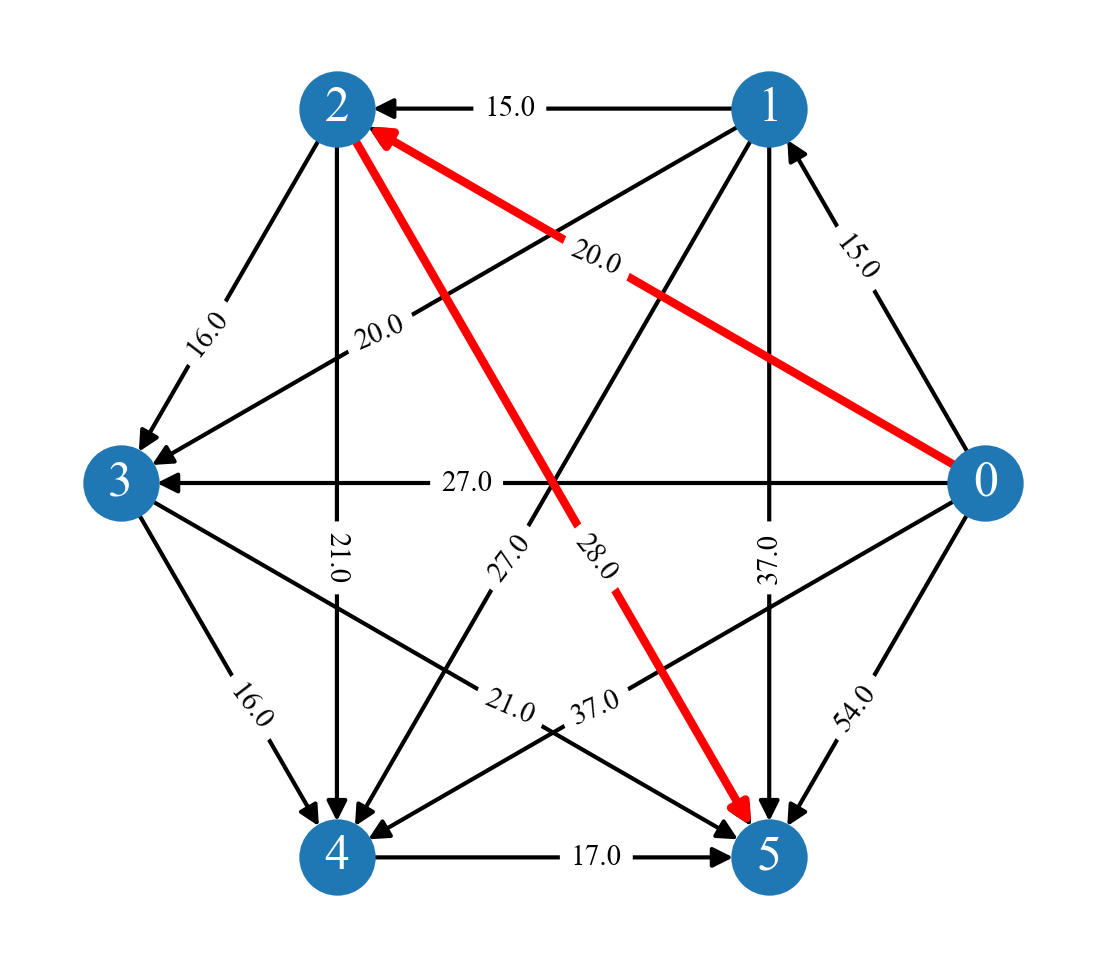

In [11]:
w = nx.get_edge_attributes(G, 'weight')
key = range(len(W))
s = ['v'+str(i) for i in key]
s = dict(zip(key, s))

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_color='w')
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=w, label_pos=0.4, font_size=7) # 设置 label_pos以防标签重叠 (默认 0.5)
ax.set_aspect(1)
fig.show()

#### 2. 选址问题

[[ 0. 20. 33. 63. 15. 30.]
 [20.  0. 20. 50. 25. 40.]
 [33. 20.  0. 30. 18. 33.]
 [63. 50. 30.  0. 48. 63.]
 [15. 25. 18. 48.  0. 15.]
 [30. 40. 33. 63. 15.  0.]]
最小值为： 33.0
最小值的地址为： 3


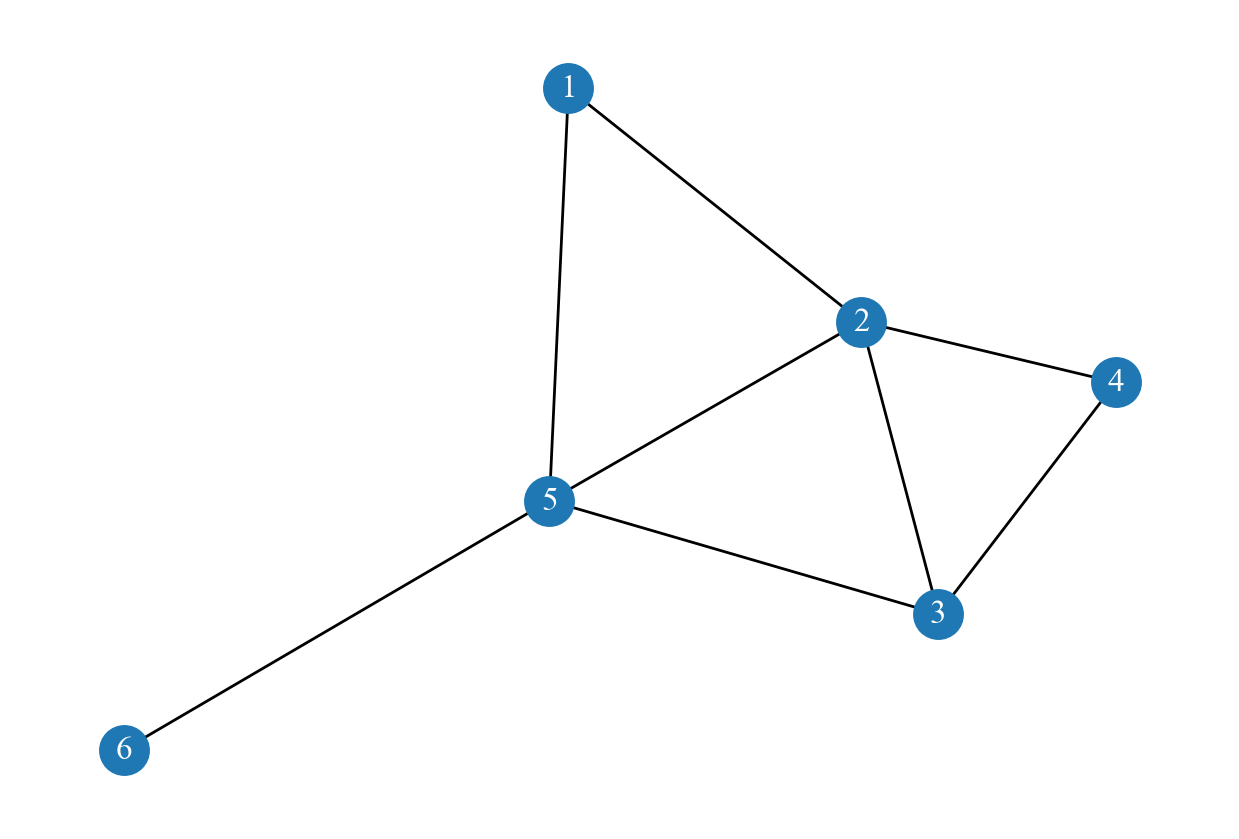

In [12]:
Adjt = [(1,2,20), (1,5,15), (2,3,20), (2,4,60), (2,5,25), (3,4,30), (3,5,18), (5,6,15)]
G = nx.Graph()
G.add_nodes_from(range(1, 7))
G.add_weighted_edges_from(Adjt)
dis = nx.floyd_warshall_numpy(G)
max_dis = np.max(dis, axis=1)
min_max_dis = np.min(max_dis)
ind = np.argmin(max_dis) + 1
print(dis)
print("最小值为：", min_max_dis)
print("最小值的地址为：", ind)
nx.draw(G, with_labels=True, font_color='w')

### 6.3.4 最短路问题的 0-1 整数规划模型

In [13]:
Adjt = [(1,2,18),(1,5,15),(2,3,20),(2,4,60),(2,5,12),
    (3,4,30),(3,5,18),(4,6,10),(5,6,15)]
W = np.ones((6,6))*1e4  #邻接矩阵初始化
for i in range(len(Adjt)):
    W[Adjt[i][0]-1, Adjt[i][1]-1] = Adjt[i][2]
    W[Adjt[i][1]-1, Adjt[i][0]-1] = Adjt[i][2]
W

array([[10000.,    18., 10000., 10000.,    15., 10000.],
       [   18., 10000.,    20.,    60.,    12., 10000.],
       [10000.,    20., 10000.,    30.,    18., 10000.],
       [10000.,    60.,    30., 10000., 10000.,    10.],
       [   15.,    12.,    18., 10000., 10000.,    15.],
       [10000., 10000., 10000.,    10.,    15., 10000.]])

In [14]:
origin, target = 1, 3
x = cp.Variable((6,6), boolean=True)
obj = cp.Minimize(cp.sum(cp.multiply(W, x)))
cons = [
    cp.sum(x[origin, :]) == 1,
    cp.sum(x[:, origin]) == 0,
    cp.sum(x[:, target]) == 1,
]
other_nodes = set(range(len(W))) - set([origin, target])
for i in other_nodes:
    cons.append(cp.sum(x[i, :]) == cp.sum(x[:, i]))
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：\n{x.value}'); print(f'最优值为：{prob.value}')
start, end = np.nonzero(x.value)
print("\n起点：", start + 1); print("终点：", end + 1)

最优解为：
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -0.  1.  0.]
 [ 0.  0.  0. -0. -0.  0.]
 [ 0.  0. -0.  0.  0. -0.]
 [ 0.  0. -0.  0.  0.  1.]
 [ 0.  0.  0.  1. -0.  0.]]
最优值为：37.0

起点： [2 5 6]
终点： [5 6 4]
